# The Log Polar Transform
> How to use the Log Polar Transform to find the relative rotation between two images.

- toc: true 
- badges: true
- comments: true
- categories: [Computer Vision]
- image: images/2020-12-20-The-Log-Polar-Transform/header.png

## The Context

As we saw in the last post, we can use FFT Phase Correlation, to find the x & y translation between two different images/arrays. However, what if there is a rotation between two images/arrays instead?

One solution is the Log-Polar transformation, which transforms the image from x,y space to $\rho$,$\theta$ space. In $\rho$,$\theta$ space, rotation and scaling between the two images manifest as 2d translations. Once we have identified the rotation between the two images, we can correct for it, before finally finding the 2d translation.

While understanding this process, I found this really good [explanation](https://sthoduka.github.io/imreg_fmt/docs/overall-pipeline/) by Santosh Thoduka, which helped make things much clearer for me. Scikit-image also has a good [demo](https://scikit-image.org/docs/stable/auto_examples/registration/plot_register_rotation.html#sphx-glr-auto-examples-registration-plot-register-rotation-py), which I learnt a lot from.

## The Log Polar Transform

The log polar transform points from (x,y) to ($\rho$,$\theta$) as follows:

$\rho = \ln\sqrt{x^2 + y^2}$

$\theta = atan2(y-y_c,x-x_c)$

To help visualise this process, let's do some experiment's with *Mondarian's Tableau I*.


In [1]:
import numpy as np
import matplotlib.pyplot as plt

import skimage.io
import skimage.transform

plt.rcParams['figure.figsize'] = [10, 10]

First, let's load and plot the image:

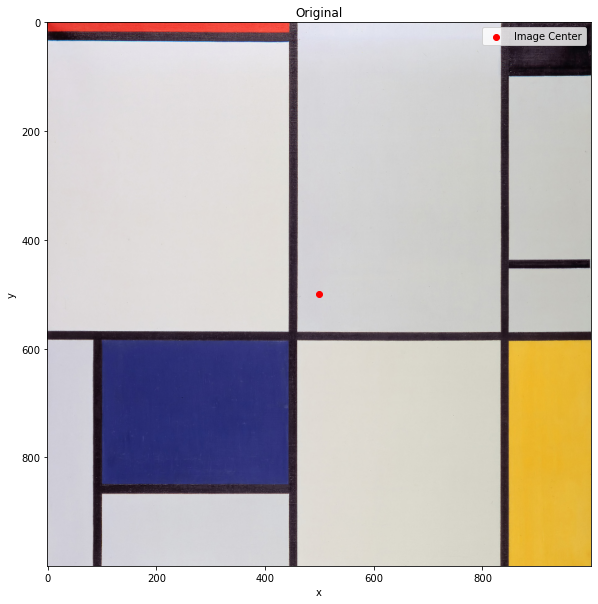

In [2]:
mondarin = skimage.io.imread('data/2020-12-20-FFT-Phase-Correlation-Rotation/mondrian.jpg')
mondarin = mondarin[0:1000,0:1000,:]
shape = mondarin.shape

plt.title('Original')
plt.scatter(shape[0]/2,shape[1]/2,color='r',label = 'Image Center')
plt.imshow(mondarin)
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Now let's compute the Log Polar Transform of the image, and visualise that as well:

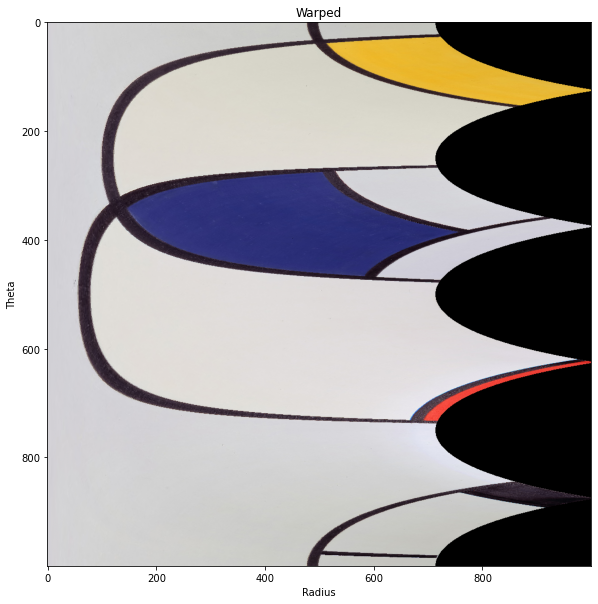

In [3]:
monarin_warped = skimage.transform.warp_polar(mondarin, radius=700, output_shape=shape, scaling='linear', order=0, multichannel=True)

plt.title('Warped')
plt.imshow(monarin_warped)
plt.xlabel('Radius')
plt.ylabel('Theta')
plt.show()

Now let's rotate the Mondarin, so that we can better understand power of the log polar transform.

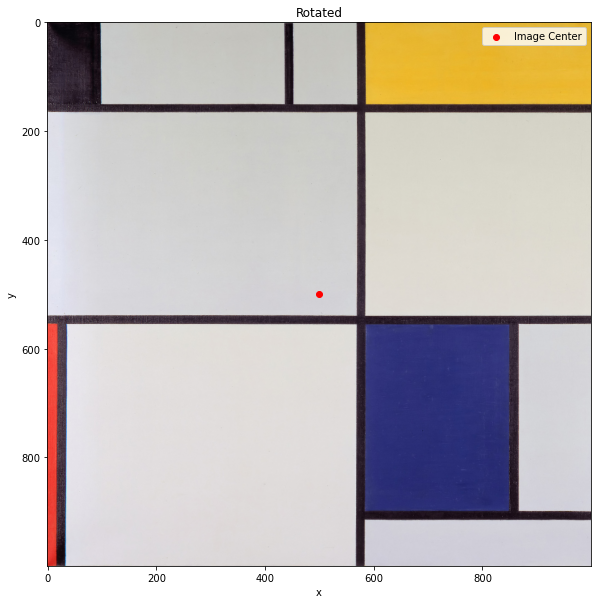

In [4]:
mondarin_rotated = skimage.transform.rotate(mondarin, 90)

plt.title('Rotated')
plt.scatter(shape[0]/2,shape[1]/2,color='r',label = 'Image Center')
plt.imshow(mondarin_rotated)
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

By comparing the transform of both the original, and the rotated *Mondarin*, we can see that a rotation in the original domain, corresponds to a translation/shift in the log polar domain.

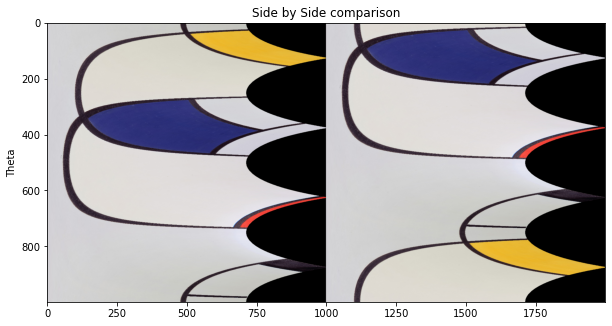

In [5]:
monarin_rotated_warped = skimage.transform.warp_polar(mondarin_rotated, radius=700, output_shape=shape, scaling='linear', order=0, multichannel=True)

plt.title('Side by Side comparison')
plt.imshow(np.hstack([monarin_warped,monarin_rotated_warped]))
plt.ylabel('Theta')
plt.show()

You can read about the Log Polar Transform in more detail [here](https://sthoduka.github.io/imreg_fmt/docs/log-polar-transform/).

## Applying theory to practice




In [6]:
from skimage.color import rgb2gray
from skimage.filters import window, difference_of_gaussians
from scipy.fftpack import fft2, fftshift

import scipy 
plt.rcParams['figure.figsize'] = [10, 10]

In [7]:
frame = skimage.io.imread('data/2020-12-20-The-Log-Polar-Transform/Frame.jpg')
image = frame[30:185,35:190]

In [8]:

img1 = rgb2gray(frame[30:185,35:190])

Rotate the image

In [9]:
angle = 30 
img2 = rotate(result, angle)

NameError: name 'rotate' is not defined

In [ ]:
Shift the image

In [ ]:
shift_x = 10
shift_y = 20

#Shift the img1 10 pixels to the right and 20 pixels down.
shifted = scipy.ndimage.fourier_shift(np.fft.fft2(img1), shift=(shift_y,shift_x))
img2 = np.fft.ifft2(shifted).real

Find Rotation

In [ ]:
def fft_phase_correlation(img1, img2):
    # window images
    img1_wimage = img1 * window('hann', img1.shape)
    img2_wimage =
    img2 * window('hann', img2.shape)

    # window images
    img1_wimage = img1 * window('hann', img1.shape)
    img2_wimage = img2 * window('hann', img2.shape)

    #Compute the corss power spectrum
    cross_power_spectrum = (img1_fs * np.conjugate(img2_fs)) / np.abs(img1_fs * np.conjugate(img2_fs))

    r = np.fft.ifft2(cross_power_spectrum).real

    r = np.fft.fftshift(r)
    
    return(r)

In [ ]:
# window images
img1_wimage = img1 * window('hann', img1.shape)
img2_wimage = img2 * window('hann', img2.shape)

# work with shifted FFT magnitudes
img1_fs = np.abs(fftshift(fft2(img1_wimage)))
img2_fs = np.abs(fftshift(fft2(img2_wimage)))

In [ ]:
# Create log-polar transformed FFT mag images and register
shape = img1_fs.shape
radius = shape[0] // 8  # only take lower frequencies

img1_fs = warp_polar(img1_fs, radius=radius, output_shape=shape, scaling='log', order=0)
img2_fs = warp_polar(img2_fs, radius=radius, output_shape=shape, scaling='log', order=0)

In [ ]:
img1_fs = img1_fs[:shape[0] // 2, :]  # only use half of FFT
img2_fs = img2_fs[:shape[0] // 2, :]

#Compute the corss power spectrum
cross_power_spectrum = (img1_fs * np.conjugate(img2_fs)) / np.abs(img1_fs * np.conjugate(img2_fs))

r = np.fft.ifft2(cross_power_spectrum).real

r = np.fft.fftshift(r)

plt.imshow(r)
plt.grid()
plt.show()

In [ ]:
# Use translation parameters to calculate rotation and scaling parameters
#shiftr, shiftc = shifts[:2]
[py,px] = np.argwhere(r==r.max())[0]

theta = (360 / shape[0]) * shiftr

img2_rotated = rotate(img2, -theta)

#Find translation
shift, error, phasediff = phase_cross_correlation(img1, img2_rotated, upsample_factor=10)

Align image

In [ ]:
rotated = rotate(img2, -theta)

#Find translation
#shifts, error, phasediff = phase_cross_correlation(img1, rotated, upsample_factor=10)
shifts = fft_phase_correlation(img1, img2):



img2_rotated = rotate(img2, -theta)


print(theta, shifts)


plt.imshow(np.dstack([img1,img2,np.zeros(img1.shape)]))
plt.show()


shiftr = shifts[0]
shiftc = shifts[1]

result = scipy.ndimage.fourier_shift(np.fft.fft2(img2_rotated), shift=(shiftr,shiftc))
result = np.fft.ifft2(result).real
translated = result


plt.imshow(np.dstack([img1,translated,np.zeros(translated.shape)]))
plt.show()